In [1]:
!pip install symspellpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 10.1 MB/s eta 0:00:00


In [2]:
from symspellpy import SymSpell, Verbosity
import pkg_resources


sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)


dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [3]:
import pandas as pd
import numpy as np

import torch
import torch . nn as nn
import torch . optim as optim
import torchvision . transforms as transforms
from torch.utils.data import DataLoader, Dataset

import string
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:

import kagglehub
from kagglehub import KaggleDatasetAdapter


file_path = "IMDB Dataset.csv"


trail = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

label = trail['sentiment']

trail =  trail.drop('sentiment', axis = 1)

print(trail.shape)


(50000, 1)


In [5]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}





In [6]:
def removeUrl(t):
    text = re.compile(r'https?://\S+|www\.\S+')
    return text.sub(r'', t)


def removeHtmlTags(t):
    pattern = re.compile('<.*?>')
    return pattern.sub(r' ', t)


# def remove_punc(text):
#     punc = string.punctuation
#     return text.translate(str.maketrans('', '', punc))

def chat_conversion(text):
    new_text = []
    for i in text.split():

        if i.upper() in chat_words:

            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)


# def find_sc(text):
#     contraction_pattern = r"\b(?:[a-zA-Z]+(?:n't|'ve|'ll|'re|'d|'s|'m))\b"
#     contractions = re.findall(contraction_pattern, text)
#     return contractions

# def expand_contractions(text, contractions_dict):
#     contraction_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
#                                       flags=re.IGNORECASE | re.DOTALL)

#     def expand_match(contraction):
#         match = contraction.group(0)
#         first_char = match[0]
#         expanded_contraction = contractions_dict.get(match) \
#             if contractions_dict.get(match) \
#             else contractions_dict.get(match.lower())


#         if expanded_contraction is not None:
#             expanded_contraction = first_char + expanded_contraction[1:]
#         else:

#             expanded_contraction = match

#         return expanded_contraction

#     expanded_text = contraction_pattern.sub(expand_match, text)
#     expanded_text = re.sub("'", "", expanded_text)
#     return expanded_text





def correct_spelling(text):
    corrected_words = []
    for word in text.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected_words.append(suggestions[0].term)
        else:
            corrected_words.append(word)
    return " ".join(corrected_words)


# stopword = stopwords.words('english')

# def remove_stopwords(text):
#     new_text = []

#     for word in text.split():
#         if word in stopword:
#             new_text.append('')
#         else:
#             new_text.append(word)
#     x = new_text[:]
#     new_text.clear()
#     return " ".join(x)



from multiprocessing import Pool, cpu_count

def parallel_spellcheck(texts):
    with Pool(cpu_count()) as p:
        return p.map(correct_spelling, texts)

In [7]:

trail['review'] = trail['review'].apply(removeHtmlTags)
trail['review'] = trail['review'].apply(chat_conversion)
trail['review'] = parallel_spellcheck(trail['review'].tolist())  
trail['review'] = trail['review'].str.lower().apply(removeUrl)



In [8]:
trail['review'] = parallel_spellcheck(trail['review'].tolist())
trail.head()

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,a thought this was a wonderful way to spend ye...
3,basically there's a family where a little boy ...
4,better matters love in the years in my eyes of...


In [9]:
!pip install huggingface_hub[hf_xet]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 76.7 MB/s eta 0:00:00


In [10]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base').to(device)
model.eval()

# Custom Dataset
class ReviewDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

# Tokenization 
def collate_fn(batch):
    return tokenizer(batch, padding=True, truncation=True, return_tensors="pt")


batch_size = 8  #
dataset = ReviewDataset(trail['review'].tolist())
loader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn)


all_vectors = []

with torch.no_grad():
    for batch in loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        cls_vectors = outputs.last_hidden_state[:, 0, :]  # CLS token
        all_vectors.append(cls_vectors.cpu())


final_embeddings = torch.cat(all_vectors, dim=0)

2025-05-15 15:25:00.949037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747322701.163647      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747322701.214239      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd




class Autoencoder(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=256, bottleneck_dim=64):
        super().__init__()
        self.encoder = nn.Sequential(
        nn.Linear(input_dim, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(p=0.2), 
        nn.Linear(512, hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),
        nn.Dropout(p=0.2), 
        nn.Linear(hidden_dim, bottleneck_dim))
            
        

        
        self.decoder = nn.Sequential(
        nn.Linear(bottleneck_dim, hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),
        nn.Dropout(p=0.2), 
        nn.Linear(hidden_dim, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(512, input_dim))


    
    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

# Initialize model
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-7)
loss_fn = nn.MSELoss()


vectors = final_embeddings.cpu()
dataset = TensorDataset(vectors)


trainSIZE = int(0.8 * len(dataset))
valSIZE = len(dataset) - trainSIZE
trainset, valset = random_split(dataset, [trainSIZE, valSIZE])



train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = DataLoader(valset, batch_size=64)


for epoch in range(15):
    model.train()
    train_loss = 0
    for (batch,) in train_loader:
        x = batch.to(device)  
        optimizer.zero_grad()
        x_recon, _ = model(x)
        loss = loss_fn(x_recon, x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * x.size(0)

    train_loss /= trainSIZE

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for (batch,) in val_loader:
            x = batch.to(device)  
            x_recon, _ = model(x)
            loss = loss_fn(x_recon, x)
            val_loss += loss.item() * x.size(0)
    val_loss /= valSIZE

    print(f"Epoch {epoch+1}/{15} - Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")


model.eval()
latent_vectors = []

full_loader = DataLoader(dataset, batch_size=64)
with torch.no_grad():
    for (batch,) in full_loader:
        x = batch.to(device)  
        _, z = model(x)
        latent_vectors.append(z.cpu())

latent_all = torch.cat(latent_vectors, dim=0)  


latent_data = pd.DataFrame(latent_all.numpy())


Epoch 1/15 - Train Loss: 0.014892, Val Loss: 0.000674
Epoch 2/15 - Train Loss: 0.001371, Val Loss: 0.000648
Epoch 3/15 - Train Loss: 0.001131, Val Loss: 0.000659
Epoch 4/15 - Train Loss: 0.001065, Val Loss: 0.000620
Epoch 5/15 - Train Loss: 0.001016, Val Loss: 0.000564
Epoch 6/15 - Train Loss: 0.000975, Val Loss: 0.000562
Epoch 7/15 - Train Loss: 0.000941, Val Loss: 0.000556
Epoch 8/15 - Train Loss: 0.000905, Val Loss: 0.000551
Epoch 9/15 - Train Loss: 0.000886, Val Loss: 0.000528
Epoch 10/15 - Train Loss: 0.000868, Val Loss: 0.000553
Epoch 11/15 - Train Loss: 0.000839, Val Loss: 0.000504
Epoch 12/15 - Train Loss: 0.000806, Val Loss: 0.000491
Epoch 13/15 - Train Loss: 0.000787, Val Loss: 0.000501
Epoch 14/15 - Train Loss: 0.000768, Val Loss: 0.000496
Epoch 15/15 - Train Loss: 0.000750, Val Loss: 0.000468


In [12]:
latent_data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.111600,-1.381503,1.397958,-0.763333,0.288301,0.326934,-0.659819,0.031709,1.683467,0.682047,...,-0.244606,1.076121,-0.096997,0.096089,0.922671,0.304608,0.477471,-0.387920,0.566197,-1.220740
1,0.304086,-0.347886,0.706314,-1.333105,-0.734715,-1.323556,-1.102219,1.160561,2.588772,-0.201010,...,-0.018290,-0.509789,-5.305376,-6.010663,0.228081,3.151511,2.984358,-0.026811,0.981243,0.419556
2,0.886553,-0.058918,0.793622,-1.159009,-0.974992,0.317920,-1.994606,2.084790,2.097012,0.826086,...,-0.717860,-0.451575,0.526789,-1.131922,0.376436,0.696651,-1.102797,0.440460,1.145616,0.338219
3,-0.308987,-2.451647,0.313568,-0.522027,-0.141353,0.338524,-2.180067,-0.393982,1.916915,0.481126,...,-1.092958,0.778545,-1.761485,-0.697315,0.930652,0.255323,1.366516,-0.167059,0.609479,-0.071357
4,0.003287,0.624822,1.692820,-1.327293,-0.121781,-1.895363,-0.962590,2.641216,3.154042,0.533866,...,-1.191441,-0.638974,-6.534015,-7.440123,-0.330148,2.348589,3.577952,-0.727472,0.803131,0.856682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.779070,0.663245,0.978435,-1.635762,-0.508223,-2.643366,-3.345766,4.547368,2.012394,3.161251,...,-1.144468,-0.935594,-0.824040,-1.978630,2.086277,0.412176,-6.254722,0.178359,-0.165846,2.384086
49996,1.306732,-1.343962,0.845528,0.198748,0.379730,1.205038,-2.018989,-0.607541,2.533703,-0.699782,...,-0.585519,1.128830,0.569146,-1.099058,0.181878,-0.320625,1.593434,-0.049302,0.111804,0.146928
49997,0.067053,-1.304814,1.831379,-0.028197,-0.521267,0.901329,-0.377412,-0.258060,2.246593,0.066370,...,-0.603740,1.185799,0.325615,0.470177,0.248532,0.532373,0.617638,0.197649,-0.367811,-1.211966
49998,0.009202,-0.858262,0.145990,-0.292930,-1.379728,1.404131,-1.766729,2.416800,3.133853,-0.773286,...,0.186792,0.120729,-5.906204,-6.183538,-0.261932,2.668665,2.946427,0.974144,1.192545,0.058343


In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [14]:

score = -1
best_l = None
best_km = None


for i in range(10):
    km = KMeans(n_clusters=2, random_state=i)
    cluster_l = km.fit_predict(latent_data)
   
    unique_labels = set(cluster_l)
    if len(unique_labels) < 2:
        print(f"Run {i+1}: Only one cluster found, skipping silhouette score.")
        continue  # Skip silhouette score for this run

    score_now = silhouette_score(latent_data, cluster_l)
    print(f"Run {i+1}: Silhouette Score = {score_now:.4f}")

    if score_now > score:
        score = score_now
        best_l = cluster_l
        best_km = km

print(f"\nBest Silhouette Score: {score:.4f}")


latent_data['cluster'] = best_l

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 1: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 2: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 3: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 4: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 5: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 6: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 7: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 8: Silhouette Score = 0.6120


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 9: Silhouette Score = 0.6121


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run 10: Silhouette Score = 0.6120

Best Silhouette Score: 0.6121


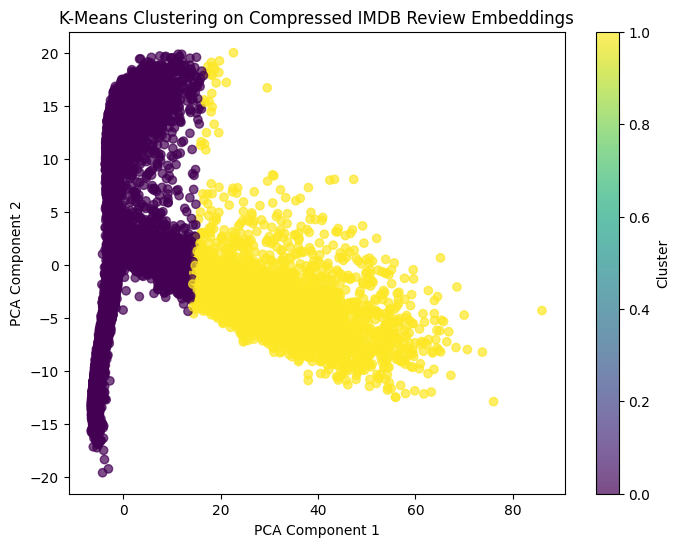

In [15]:
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_data.drop(columns=['cluster']))

plt.figure(figsize=(8, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=best_l, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering on Compressed IMDB Review Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [16]:
sil_score = silhouette_score(latent_2d, cluster_l)
print(sil_score)

0.72620857


In [17]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from scipy.optimize import linear_sum_assignment

In [18]:

def compare_clusters(true_l, pred_l):
    
    ari = adjusted_rand_score(true_l, pred_l)
    print(f"Adjusted Rand Index: {ari:.4f}")

     
    nmi = normalized_mutual_info_score(true_l, pred_l)
    print(f"Normalized Mutual Information: {nmi:.4f}")

    #
    h = homogeneity_score(true_l, pred_l)
    c = completeness_score(true_l, pred_l)
    v = v_measure_score(true_l, pred_l)
    print(f"Homogeneity: {h:.4f}")
    print(f"Completeness: {c:.4f}")
    print(f"V-measure: {v:.4f}")

   
    def cluster_accuracy(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        D = max(y_pred.max(), y_true.max()) + 1
        w = np.zeros((D, D), dtype=np.int64)
        for i in range(y_pred.size):
            w[y_pred[i], y_true[i]] += 1
        r_ind, c_ind = linear_sum_assignment(w.max() - w)
        return sum([w[i,j] for i,j in zip(r_ind, c_ind)]) / y_pred.size

    acc = cluster_accuracy(true_l, pred_l)
    print(f"Accuracy (best label mapping): {acc:.4f}")

true_l = label.map({'positive': 1, 'negative': 0}).values
compare_clusters(true_l, best_l)


Adjusted Rand Index: 0.0002
Normalized Mutual Information: 0.0009
Homogeneity: 0.0006
Completeness: 0.0017
V-measure: 0.0009
Accuracy (best label mapping): 0.5076
